In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


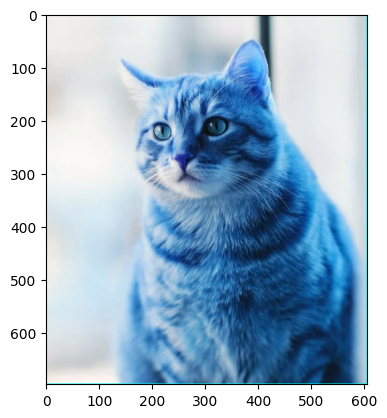

In [ ]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load an image from the specified path
image = cv.imread("/content/drive/MyDrive/Deep Learning-12/Class-6/Cats.jpg")

# Convert the loaded image to grayscale
image_gray_scale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to create a binary image
_, binary_image = cv.threshold(image_gray_scale, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Find connected components in the binary image
# The second element of the return value will be the markers
markers = cv.connectedComponents(binary_image)[1]

# Increment all marker values by 1
markers = markers + 1

# Set marker values to 1 where the binary image is 255
markers[binary_image == 255] = 1

# Apply the watershed algorithm to segment the image
segmented_image = cv.watershed(image, markers)

# Set pixels with watershed markers equal to -1 to a specific color (e.g., [0, 255, 255])
image[segmented_image == -1] = [0, 255, 255]

# Display the segmented image
plt.imshow(image)
plt.show()

